In [5]:
import pandas as pd

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

## Load up the data -- this will take a couple seconds
url = "https://datascience.quantecon.org/assets/data/state_unemployment.csv"
unemp_raw = pd.read_csv(url, parse_dates=["Date"])
## Create the pivot table
unemp_all = (
    unemp_raw
    .reset_index()
    .pivot_table(index="Date", columns="state", values="UnemploymentRate")
)



In [10]:
#DataFrame for Exercise 1
states = [
    "Arizona", "California", "Florida", "Illinois",
    "Michigan", "New York", "Texas"
]
unemp = unemp_all[states]

unemp.head()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
2000-05-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3


## Exercises


<a id='exerciselist-0'></a>
**Exercise 1**

Looking at the displayed DataFrame above, can you identify the index? The columns?

You can use the cell below to verify your visual intuition.

In [11]:
'''
According to the previous section, the index of a DataFrame or Series object refers to
its row labels, so the dates in the first column are the indices. The columns labels
coincide with that of any other table or Excel spreadsheet, so the columns contain
data organized by state
'''
#Should print dates
print(unemp.index)
#Should print US states
print(unemp.columns)

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='Date', length=216, freq=None)
Index(['Arizona', 'California', 'Florida', 'Illinois', 'Michigan', 'New York',
       'Texas'],
      dtype='object', name='state')


([*back to text*](https://datascience.quantecon.org/#exercise-0))

**Exercise 2**

Do the following exercises in separate code cells below:

- At each date, what is the minimum unemployment rate across all states
  in our sample?  
- What was the median unemployment rate in each state?  
- What was the maximum unemployment rate across the states in our
  sample? What state did it happen in? In what month/year was this
  achieved?  
  - Hint 1: What Python type (not `dtype`) is returned by the
    aggregation?  
  - Hint 2: Read documentation for the method `idxmax`  
- Classify each state as high or low volatility based on whether the
  variance of their unemployment is above or below 4.  

In [46]:
# Exercise 2.1
# Min unemployment rate for a particular DateTimeIndex (row label), Axis=1 checks by row
unemp.min(axis=1)

Date
2000-01-01    3.3
2000-02-01    3.2
2000-03-01    3.2
2000-04-01    3.3
2000-05-01    3.5
             ... 
2017-08-01    4.0
2017-09-01    3.9
2017-10-01    3.9
2017-11-01    3.9
2017-12-01    3.9
Length: 216, dtype: float64

In [47]:
# Exercise 2.2
# Median unemployment rate by state
unemp.median()

state
Arizona       5.80
California    6.50
Florida       5.35
Illinois      6.15
Michigan      7.00
New York      5.70
Texas         5.40
dtype: float64

In [64]:
# Exercise 2.3
# First aggregation is to find max of every column (state), returns a DataFrame or Series still, so more to parse!
max_in_states = unemp.max()
# Now for the new DataFrame obtained, find the label associated with the max
max_label = max_in_states.idxmax()

'''
Now we put it all together, printing the DateTimeIndex in the unemp DataFrame
associated with the state in `max_label` we found, then printing the state itself.

In other words, once we find the column label associated with the max in a DataFrame,
it becomes a key tool we can use to locate the rest of its associated data
'''
print(f"The highest unemployment rate in the set was {unemp.max()[max_label]}% on"
      f" {unemp.idxmax()[max_label]} in {max_label}")
# It occured in Michigan, on 2009-06-01

The highest unemployment rate in the set was 14.6% on 2009-06-01 00:00:00 in Michigan


In [63]:
# Exercise 2.3
# Use var function for DataFrame and conditional to tag each column as high or low

def vol_lvl(s) :
    if s.var() > 4:
        out = "High"
    else:
        out = "Low"
        
    return out

# Getter function for variance to compare side-by-side in the aggregation
def variance(s) :
    return s.var()

unemp.agg([vol_lvl, variance])

,Arizona,California,Florida,Illinois,Michigan,New York,Texas
vol_lvl,High,High,High,Low,High,Low,Low
variance,4.179021,6.039162,5.780556,3.846785,6.81734,2.29353,1.663234


([*back to text*](https://datascience.quantecon.org/#exercise-1))

**Exercise 3**

Imagine that we want to determine whether unemployment was high (> 6.5),
medium (4.5 < x <= 6.5), or low (<= 4.5) for each state and each month.

1. Write a Python function that takes a single number as an input and
  outputs a single string noting if that number is high, medium, or low.  
1. Pass your function to `applymap` (quiz: why `applymap` and not
  `agg` or `apply`?) and save the result in a new DataFrame called
  `unemp_bins`.  
1. (Challenging) This exercise has multiple parts:  
  1. Use another transform on `unemp_bins` to count how many
    times each state had each of the three classifications.  
    - Hint 1: Will this value counting function be a Series or scalar
      transform?  
    - Hint 2: Try googling "pandas count unique value" or something
      similar to find the right transform.  
  1. Construct a horizontal bar chart of the number of occurrences of
    each level with one bar per state and classification (21 total
    bars).  
1. (Challenging) Repeat the previous step, but count how many states had
  each classification in each month. Which month had the most states
  with high unemployment? What about medium and low?  

In [119]:
# Exercise 3.1: Write a Python function to classify unemployment levels.
def level(x):
    if (x > 6.5):
        return "High"
    elif (x > 4.5 and x <= 6.5):
        return "Medium"
    elif (x <= 4.5):
        return "Low"

In [117]:
# Exercise 3.2: Pass function from part 1 to applymap
unemp_bins = unemp.applymap(level)
print(unemp)
print(unemp_bins)
# Top and bottom comparison of value to correpsonding level (low, med, high)

state       Arizona  California  Florida  Illinois  Michigan  New York  Texas
Date                                                                         
2000-01-01      4.1         5.0      3.7       4.2       3.3       4.7    4.6
2000-02-01      4.1         5.0      3.7       4.2       3.2       4.7    4.6
2000-03-01      4.0         5.0      3.7       4.3       3.2       4.6    4.5
2000-04-01      4.0         5.1      3.7       4.3       3.3       4.6    4.4
2000-05-01      4.0         5.1      3.7       4.3       3.5       4.6    4.3
...             ...         ...      ...       ...       ...       ...    ...
2017-08-01      4.7         4.6      4.0       5.0       4.6       4.7    4.0
2017-09-01      4.7         4.5      3.9       5.0       4.7       4.7    4.0
2017-10-01      4.7         4.5      3.9       4.9       4.7       4.7    3.9
2017-11-01      4.7         4.5      3.9       4.9       4.7       4.7    3.9
2017-12-01      4.7         4.5      3.9       4.9       4.7    

This brings up the table without needing to transpose
            Medium  High  Low
Arizona         97    75   44
California     106   106    4
Florida         79    68   69
Illinois       106    91   19
Michigan        57   142   17
New York       129    65   22
Texas          107    51   58
This however, is simpler
state   Arizona  California  Florida  Illinois  Michigan  New York  Texas
High         75         106       68        91       142        65     51
Low          44           4       69        19        17        22     58
Medium       97         106       79       106        57       129    107


<AxesSubplot:xlabel='state'>

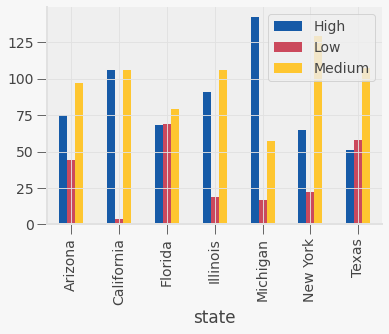

In [223]:
# Exercise 3.3: Count the number of times each state had each classification.
'''
Using a list comprehension and value_counts transform to compile
a list of series that can be stitched back into a DataFrame
'''
series_list = [unemp_bins[column].value_counts() for column in unemp_bins.columns]
state_data = pd.DataFrame(data=series_list)
print("This brings up the table without needing to transpose")
print(state_data)
'''
Using the apply to transform the DataFrame, you get
the actually elegant solution after my brain turned on.
Requires data transpose, however.'''
state_data = unemp_bins.apply(pd.Series.value_counts, axis=0)
print("This however, is simpler")
print(state_data)
state_data.transpose().plot(kind='bar')

In [222]:
# Exercise 3.4: Apply the same transform from part 4, but to each date instead of to each state.
# Only requires a change in axis, graphing would be far too intensive with 216 dates to plot though
date_data = unemp_bins.apply(pd.Series.value_counts, axis=1)
#lookups for the 
high_max = date_data['High'].max()
med_max = date_data['Medium'].max()
low_max = date_data['Low'].max()

print(date_data)
print(f"The high max was {high_max} on {date_data['High'].idxmax()}"
      f"\nThe medium max was {med_max} on {date_data['Medium'].idxmax()}"
      f"\nThe low max was {low_max} on {date_data['Low'].idxmax()}")
    


            High  Low  Medium
Date                         
2000-01-01   NaN  4.0     3.0
2000-02-01   NaN  4.0     3.0
2000-03-01   NaN  5.0     2.0
2000-04-01   NaN  5.0     2.0
2000-05-01   NaN  5.0     2.0
...          ...  ...     ...
2017-08-01   NaN  2.0     5.0
2017-09-01   NaN  3.0     4.0
2017-10-01   NaN  3.0     4.0
2017-11-01   NaN  3.0     4.0
2017-12-01   NaN  3.0     4.0

[216 rows x 3 columns]
The high max was 7.0 on 2009-04-01 00:00:00
The medium max was 7.0 on 2001-09-01 00:00:00
The low max was 6.0 on 2000-08-01 00:00:00


([*back to text*](https://datascience.quantecon.org/#exercise-2))

**Exercise 4**

- For a single state of your choice, determine what the mean
  unemployment is during "Low", "Medium", and "High" unemployment times
  (recall your `unemp_bins` DataFrame from the exercise above).  
  - Think about how you would do this for all the
    states in our sample and write your thoughts... We will soon
    learn tools that will *greatly* simplify operations like
    this that operate on distinct *groups* of data at a time.  
- Which states in our sample performs the best during "bad times?" To
  determine this, compute the mean unemployment for each state only for
  months in which the mean unemployment rate in our sample is greater
  than 7.  


([*back to text*](https://datascience.quantecon.org/#exercise-3))

In [257]:
#Exercise 4
texas_data = unemp['Texas']

print("The mean rate of low unemployment months in Texas was "
      f"approximately {texas_data.loc[texas_data <= 4.5].mean()}%")
print("The mean rate of medium unemployment months in Texas was "
      f"approximately {texas_data.loc[(texas_data > 4.5) & (texas_data <= 6.5)].mean()}%")
print("The mean rate of high unemployment months in Texas was "
      f"approximately {texas_data.loc[texas_data > 6.5].mean()}%")

'''
One option is to create aggregation functions that calculates the means of low, medium, and high periods
for a particular series aka a column corresponding to a state. Then using a list comprehension, the new data can be
stacked and stitched into a new DataFrame. Without stitching however, organizing 3 new series per state becomes
very disorganized and or hard to read.
'''

#Using list comprehensions to obtain relevant data per column (state), then taking mean of each series in the list and printing
worst_data = [unemp[column].loc[unemp[column] > 7] for column in unemp.columns]
worst_str = [f"{column.name} had an overall mean unemployment rate of {column.mean()}% "
             "during high unemployment periods" for column in worst_data]

print(*worst_str, sep="\n")
#print(*(column.mean() for column in worst_data) + {column.index}", sep = "\n")

The mean rate of low unemployment months in Texas was approximately 4.298275862068965%
The mean rate of medium unemployment months in Texas was approximately 5.567289719626169%
The mean rate of high unemployment months in Texas was approximately 7.552941176470589%
Arizona had an overall mean unemployment rate of 9.03846153846154% during high unemployment periods
California had an overall mean unemployment rate of 10.234210526315788% during high unemployment periods
Florida had an overall mean unemployment rate of 9.568965517241379% during high unemployment periods
Illinois had an overall mean unemployment rate of 9.423529411764704% during high unemployment periods
Michigan had an overall mean unemployment rate of 9.465384615384615% during high unemployment periods
New York had an overall mean unemployment rate of 8.286666666666669% during high unemployment periods
Texas had an overall mean unemployment rate of 7.9727272727272736% during high unemployment periods
